In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

c:\Users\yosef\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
x_train_gray = np.load("x_train_grayN2.npy")
x_train_color = np.load("x_train_colorN2.npy")
x_test_gray = np.load("x_test_grayN2.npy")
x_test_color = np.load("x_test_colorN2.npy")

In [3]:
def build_unet(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Bottleneck
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    
    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    
    # Output layer (3 channels for RGB)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Build the model
input_shape = (256, 256, 1)  # Grayscale manga image shape
model = build_unet(input_shape)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 128, 128, 128)  │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 256, 256, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 740,227 (2.82 MB)

 Trainable params: 740,227 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(
    x_train_gray, x_train_color,
    epochs=50,
    batch_size=16)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - loss: 0.0758
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - loss: 0.0243
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - loss: 0.0190
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - loss: 0.0166
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - loss: 0.0153
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - loss: 0.0141
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - loss: 0.0133
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - loss: 0.0128
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - loss: 0.0120
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - loss: 0.0115
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - loss: 0.0113
Epoch 12/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - loss: 0.0111
Epoch 13/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - loss: 0.0109
Epoch 14/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - loss: 0.0106
Epoch 15/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24

In [5]:
model.save("unet_colorizationN2RGB.keras")

In [ ]:
model = load_model("unet_colorizationN2RGB.keras")

In [6]:
prediction = model.predict(x_test_gray)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 681ms/step


In [7]:
def display_results(original, grayscale, predicted):
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(original)

    plt.subplot(1, 3, 2)
    plt.title('Grayscale')
    plt.imshow(grayscale, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title('Predicted')
    plt.imshow(predicted)

    plt.show()

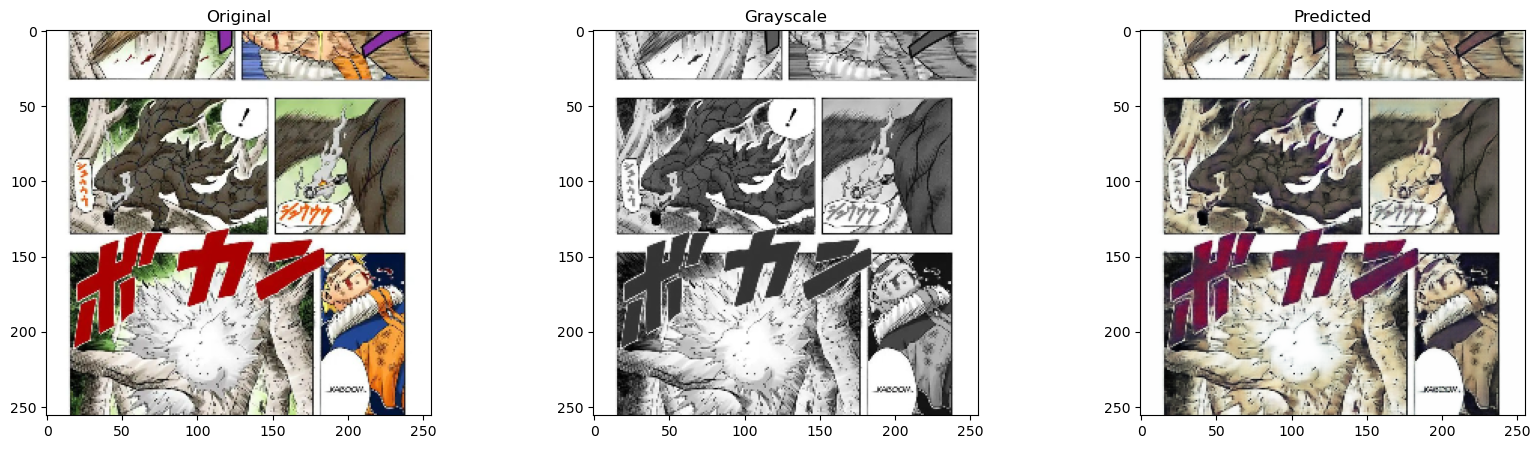

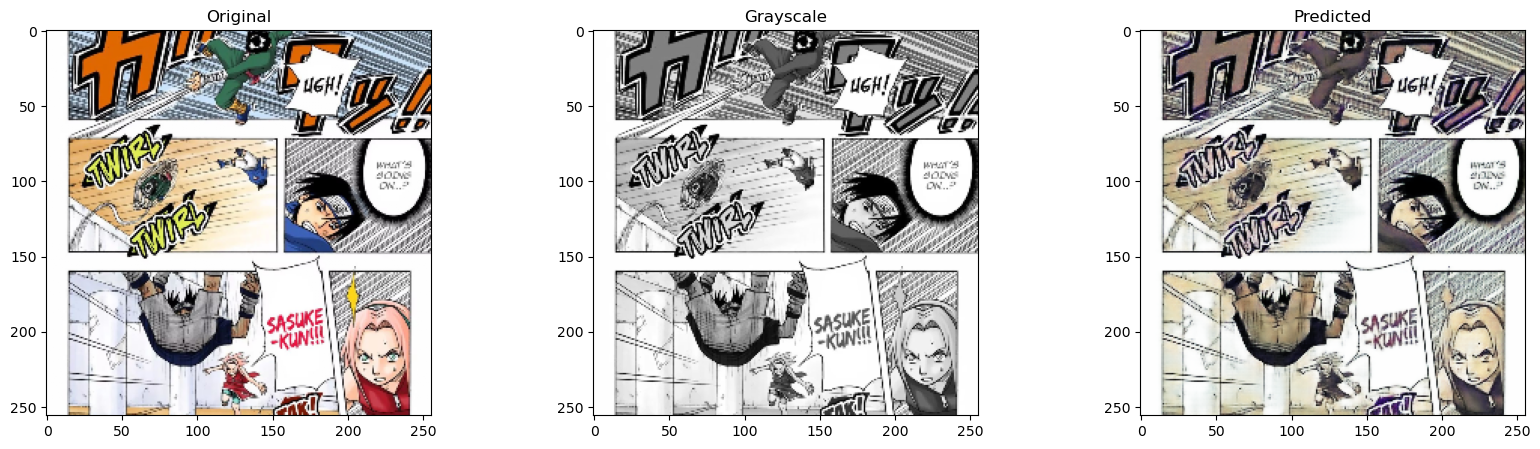

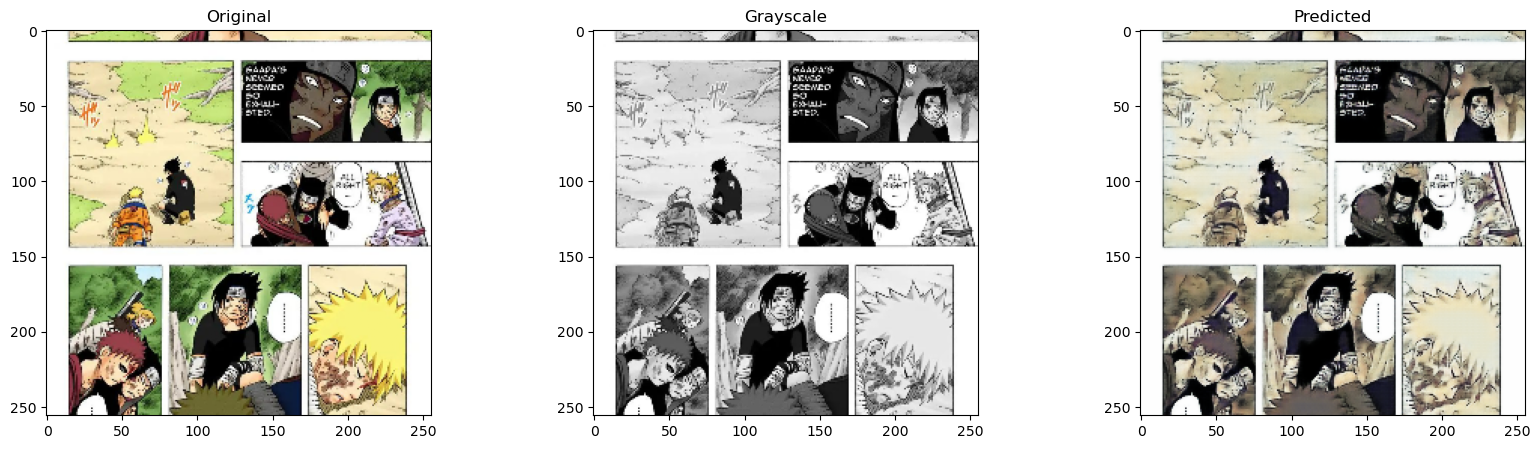

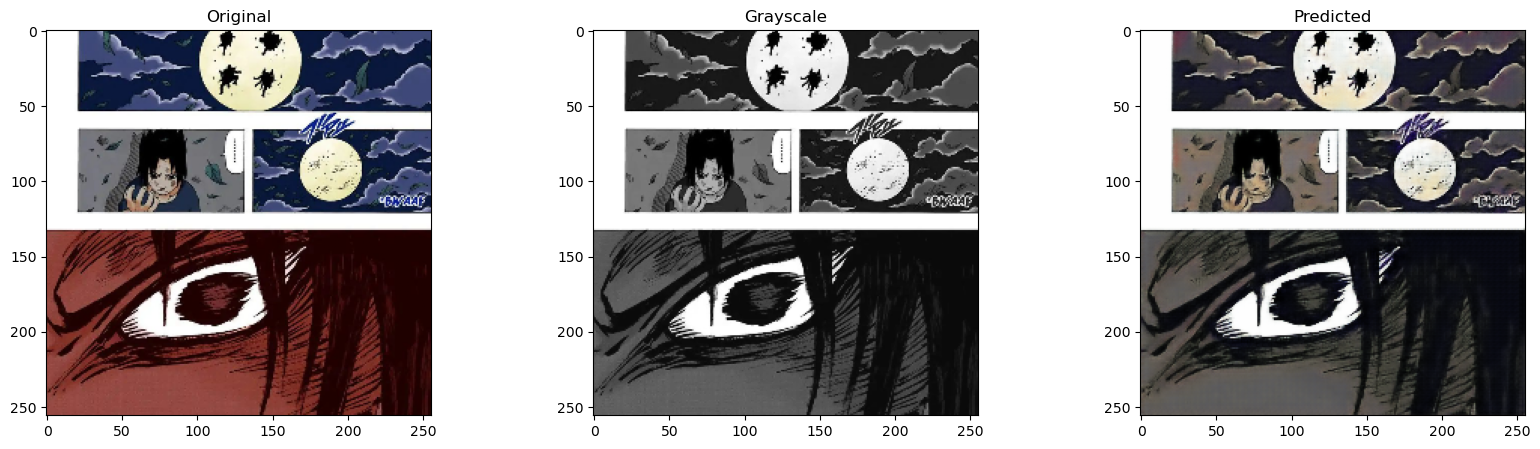

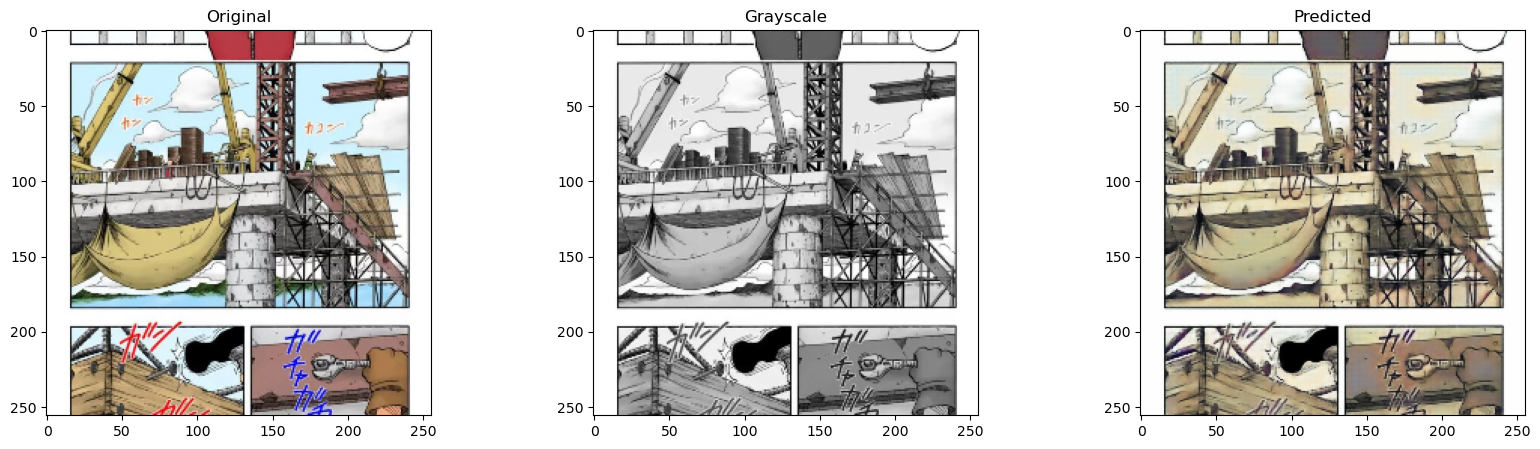

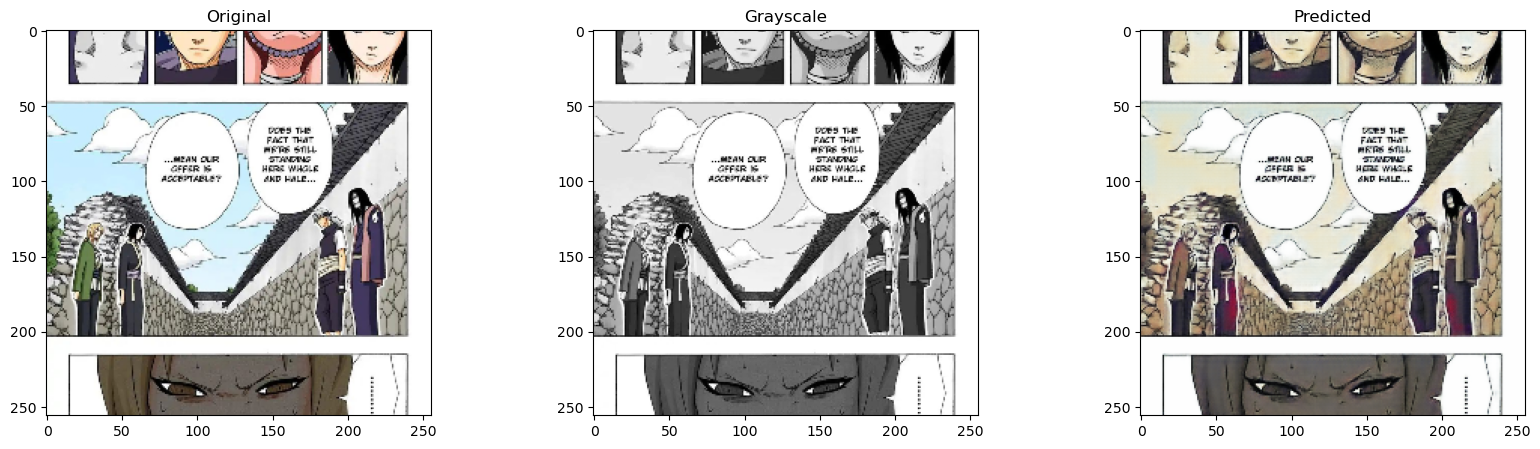

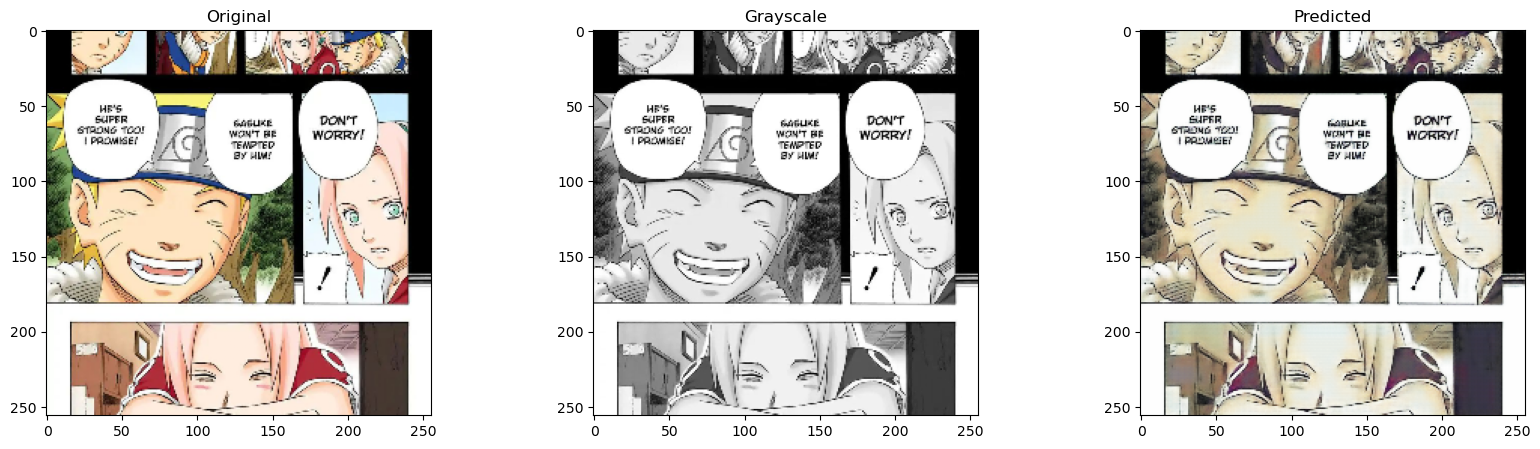

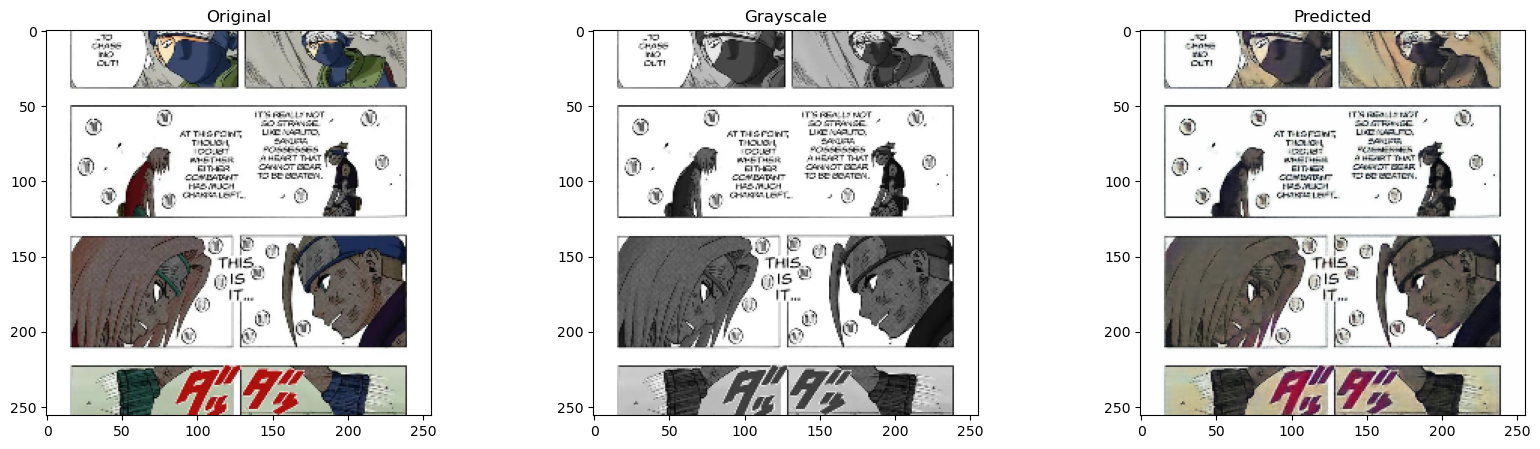

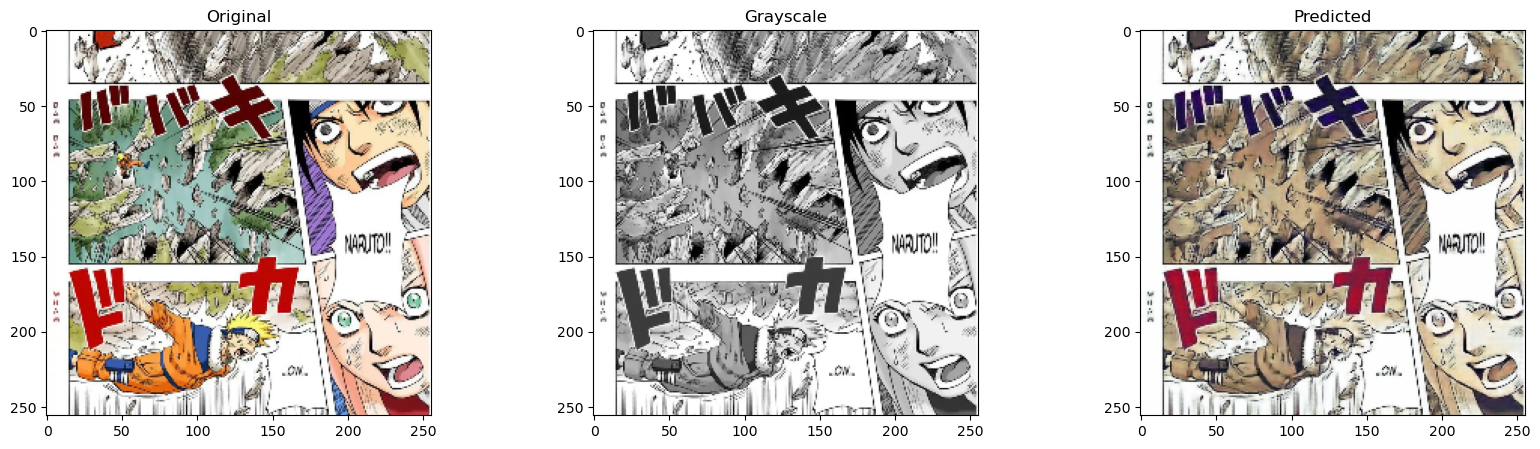

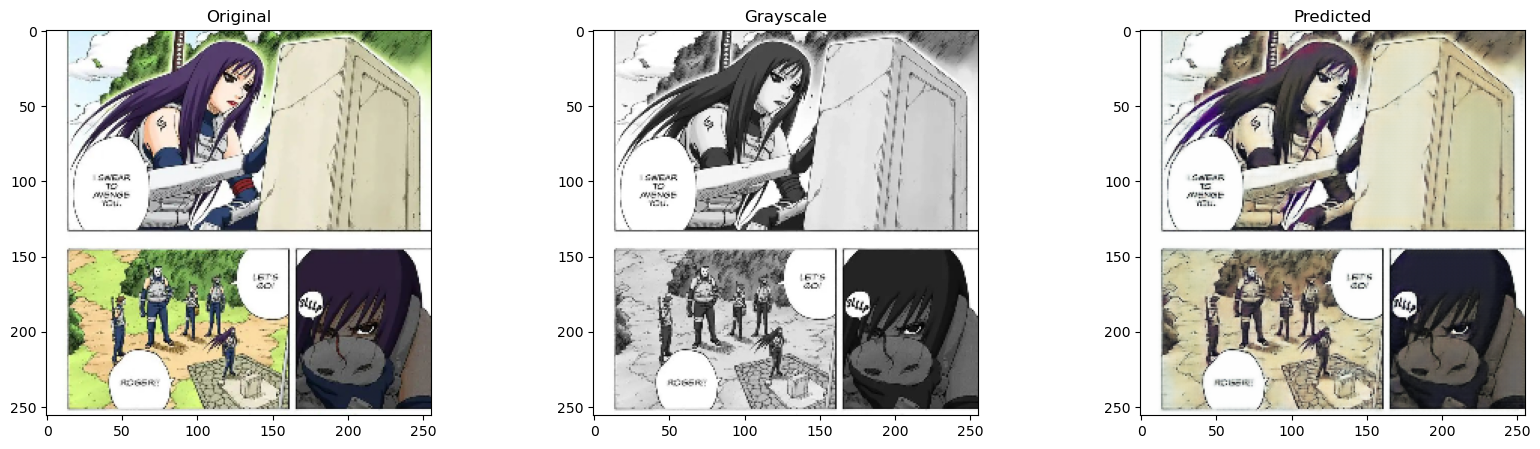

In [8]:

for i in range(10):
    display_results(x_test_color[i], x_test_gray[i], prediction[i])